<a href="https://colab.research.google.com/github/Punith6738/158CS21016CIE-33/blob/main/Assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KMeans Clustering using Evaluation matrix.            


Inertia:

In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [20]:
X,y = load_iris(return_X_y=True)

In [21]:
inertias = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X,y)
  inertias.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [22]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 26.386869755037445


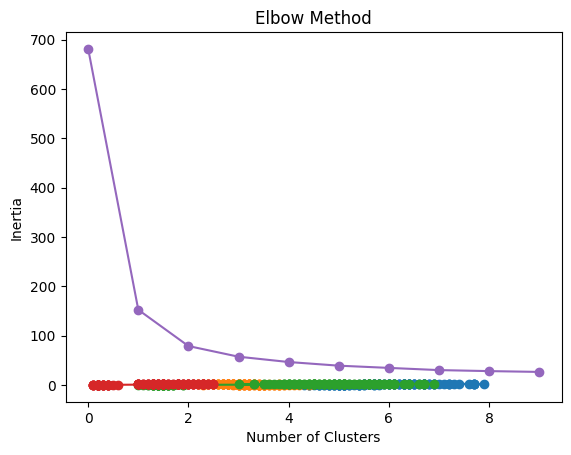

In [23]:
plt.plot(X,y, inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Dunn Index:

In [24]:
from sklearn.metrics import pairwise_distances
import itertools

In [25]:
cluster_centers = kmeans.cluster_centers_
inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')

In [26]:
intra_cluster_distances = []
labels = kmeans.labels_
for i in range(n_clusters):
    cluster_points = X[labels == i]
    distances = pairwise_distances(cluster_points, metric='euclidean')
    max_intra_distance = np.max(distances)
    intra_cluster_distances.append(max_intra_distance)

In [27]:
dunn_index = np.max(inter_cluster_distances) / np.max(intra_cluster_distances)
print("Dunn Index:", dunn_index)

Dunn Index: 4.623937557763114


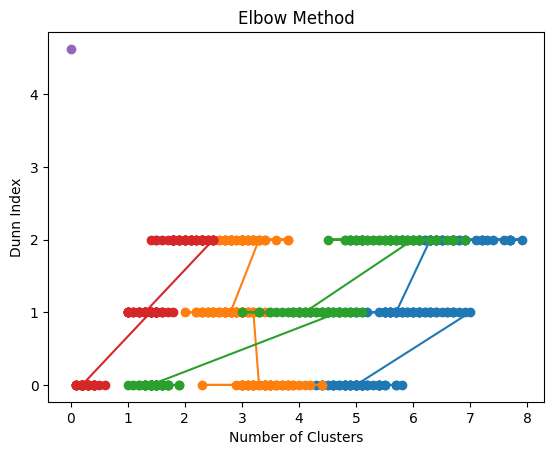

In [29]:
plt.plot(X,y,dunn_index , marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Dunn Index")
plt.show()

PCA (Principal Component Analysis).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
data = load_iris()
X = data.data
y = data.target

In [ ]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

In [ ]:
n_components = 4

In [ ]:
pca = PCA(n_components=n_components)

In [ ]:
X_reduced = pca.fit_transform(X_standardized)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [0.72962445 0.22850762 0.03668922 0.00517871]


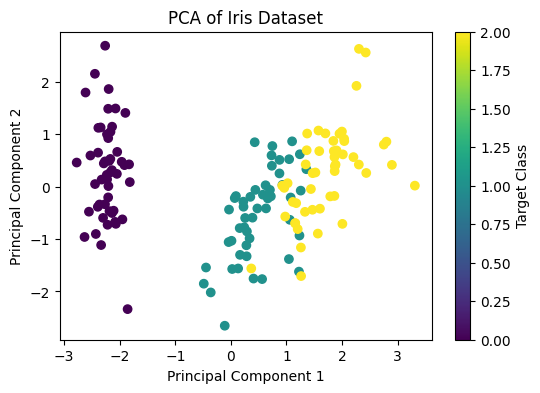

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target Class')
plt.show()